Random Forest Results
Accuracy:  0.9909762100082035
Precision:  1.0
Recall:  0.9811320754716981
Mushroom Data Set (Classification)
   type  cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0     1          5            2          4        1     6                1   
1     0          5            2          9        1     0                1   
2     0          0            2          8        1     3                1   
3     1          5            3          8        1     6                1   
4     0          5            2          3        0     5                1   

   gill_spacing  gill_size  gill_color  ...  stalk_surface_below_ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0         

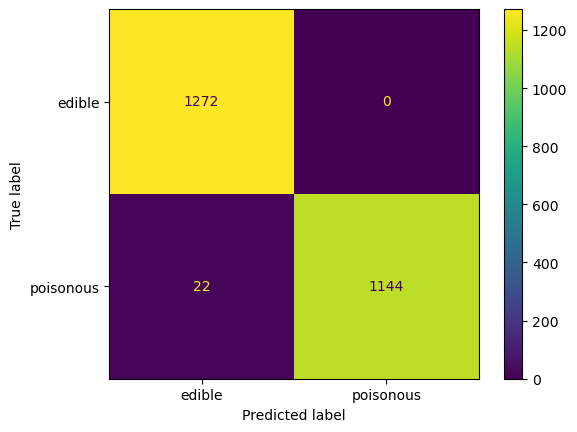

In [19]:
# Binary Classification Web App

# Import necessary libraries
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.utils import plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, precision_score, recall_score
import matplotlib.pyplot as plt

# Load and preprocess data
def load_data():
    data = pd.read_csv("mushrooms.csv")
    labelencoder = LabelEncoder()
    for col in data.columns:
        data[col] = labelencoder.fit_transform(data[col])
    return data

df = load_data()
class_names = ['edible', 'poisonous']

# Split the data
def split(df):
    y = df['type']
    x = df.drop(columns=['type'])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split(df)

# Define function to plot metrics
def plot_metrics(metrics_list, model):
    if 'Confusion Matrix' in metrics_list:
        plt.figure(figsize=(5, 4))
        plot_confusion_matrix(model, x_test, y_test, display_labels=class_names)
        plt.show()

    if 'ROC Curve' in metrics_list:
        plt.figure(figsize=(5, 4))
        plot_roc_curve(model, x_test, y_test)
        plt.show()
        
    if 'Precision-Recall Curve' in metrics_list:
        plt.figure(figsize=(5, 4))
        plot_precision_recall_curve(model, x_test, y_test)
        plt.show()

# Classifier selection and parameter setting
classifier = 'Random Forest'  # Example classifier

if classifier == 'Support Vector Machine (SVM)':
    C = 1.0  # Example value
    kernel = 'rbf'  # Example value
    gamma = 'scale'  # Example value
    metrics = ['Confusion Matrix', 'ROC Curve', 'Precision-Recall Curve']
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print("SVM Results")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision_score(y_test, y_pred, labels=class_names))
    print("Recall: ", recall_score(y_test, y_pred, labels=class_names))
    plot_metrics(metrics, model)

elif classifier == 'Random Forest':
    n_estimators = 100  # Example value
    max_depth = 5  # Example value
    bootstrap = True  # Example value
    metrics = ['Confusion Matrix', 'ROC Curve', 'Precision-Recall Curve']
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, bootstrap=bootstrap, n_jobs=-1)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print("Random Forest Results")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision_score(y_test, y_pred, labels=class_names))
    print("Recall: ", recall_score(y_test, y_pred, labels=class_names))
    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, display_labels=class_names)
    # ConfusionMatrixDisplay(metrics, model)

# Display raw data
print("Mushroom Data Set (Classification)")
print(df.head())
print("This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.")